# 003. Zenodo Analysis

The goal of this script is to be able to extract metadata from zenodo repositories. 

In [1]:
from dotenv import dotenv_values

config = dotenv_values(".env")

ZENODO_TOKEN = config['ZENODO_TOKEN']

In [2]:
import requests
response = requests.get('https://zenodo.org/api/records/?sort=mostrecent&communities=epfl&page=1&size=1000',
                        params={'communities': 'epfl',
                                'access_token': ZENODO_TOKEN})

## Include Token as a secret!

In [27]:
import pandas as pd
d = {'doi':[], 'title':[], 'html':[], 'description':[], 'keywords':[], 'license_id':[], 'publication_date':[], 'created':[], 'updated':[],
    'resource_type':[], 'version_downloads':[], 'version_unique_downloads':[], 'version_views':[], 'version_unique_views':[], 'creators':[],
    'conceptdoi':[]}

hits = response.json()['hits']['hits']

for item in hits:
    try:
        d['conceptdoi'].append(item['conceptdoi'])
    except:
        d['conceptdoi'].append(None)
        
    try:
        d['created'].append(item['created'])
    except:
        d['created'].append(None)
        
    try:
        d['doi'].append(item['doi'])
    except:
        d['doi'].append(None)
        
    try:
        d['html'].append(item['links']['html'])
    except:
        d['html'].append(None)
        
    try:
        d['creators'].append(item['metadata']['creators'])
    except:
        d['creators'].append(None)
    
    try:
        d['description'].append(item['metadata']['description'])
    except:
        d['description'].append(None)
        
    try:
        d['keywords'].append(item['metadata']['keywords'])
    except:
        d['keywords'].append(None)
    try:
        d['license_id'].append(item['metadata']['license']['id'])
    except:
        d['license_id'].append(None)
        
    d['publication_date'].append(item['metadata']['publication_date'])
    d['resource_type'].append(item['metadata']['resource_type']['title'])
    d['title'].append(item['metadata']['title'])
    d['version_downloads'].append(item['stats']['version_downloads'])
    d['version_unique_downloads'].append(item['stats']['version_unique_downloads'])
    d['version_views'].append(item['stats']['version_views'])
    d['version_unique_views'].append(item['stats']['version_unique_views'])
    d['updated'].append(item['updated'])


zenodoDF = pd.DataFrame(d)

zenodoDF["publication_date"] = pd.to_datetime(zenodoDF["publication_date"])
zenodoDF["created"] = pd.to_datetime(zenodoDF["created"])
zenodoDF["updated"] = pd.to_datetime(zenodoDF["updated"])

In [4]:
zenodoDF

,doi,title,html,description,keywords,license_id,publication_date,created,updated,resource_type,version_downloads,version_unique_downloads,version_views,version_unique_views,creators,conceptdoi
0,10.5281/zenodo.7530512,A striatal circuit balances learned fear in th...,https://zenodo.org/record/7530512,<p>This repository stores the raw data that ga...,"[fear memory, auditory fear conditioning, tail...",CC-BY-4.0,2023-01-30,2023-01-30T14:35:05.287938+00:00,2023-02-02T02:27:09.263189+00:00,Dataset,27.0,20.0,43.0,29.0,[{'affiliation': 'Laboratory of Synaptic Mecha...,10.5281/zenodo.4003653
1,10.5281/zenodo.7572629,Large-eddy Simulation of a Wind-turbine Array ...,https://zenodo.org/record/7572629,<p>Dataset of the paper &quot;Large-eddy Simul...,None,CC-BY-4.0,2022-01-11,2023-01-26T10:30:43.193273+00:00,2023-01-26T14:26:44.218745+00:00,Dataset,91.0,15.0,117.0,91.0,[{'affiliation': 'École Polytechnique Fédérale...,10.5281/zenodo.5838647
2,10.5281/zenodo.7562332,A Multimodal Dataset for Automatic Edge-AI Cou...,https://zenodo.org/record/7562332,<p>Counting the number of times a patient coug...,"[edge-AI, automatic cough detection, multimoda...",CC-BY-4.0,2023-01-23,2023-01-23T18:02:29.825540+00:00,2023-01-25T08:37:53.323608+00:00,Dataset,0.0,0.0,12.0,8.0,[{'affiliation': 'Embedded Systems Laboratory ...,10.5281/zenodo.7562331
3,10.5281/zenodo.7551315,EPFL Library Research Data Management Fastguides,https://zenodo.org/record/7551315,<p>First introduced as posters by EPFL Library...,"[Research Data Management, Data lifecycle, FAI...",CC-BY-NC-SA-4.0,2023-01-19,2023-01-19T14:08:38.809389+00:00,2023-01-20T02:26:55.886802+00:00,Poster,513.0,446.0,877.0,749.0,"[{'affiliation': 'EPFL', 'name': 'Varrato, Fra...",10.5281/zenodo.3327829
4,10.5281/zenodo.7545696,Arcangelo Corelli - Sonate a tre (A corpus of...,https://zenodo.org/record/7545696,"<p>This corpus of annotated <a href=""https://m...","[corpora, symbolic datasets, scores, harmony, ...",CC-BY-NC-SA-4.0,2023-01-04,2023-01-17T21:40:25.305383+00:00,2023-01-18T14:26:51.307758+00:00,Dataset,0.0,0.0,17.0,9.0,[{'affiliation': 'École Polytechnique Fédérale...,10.5281/zenodo.7504011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,10.5281/zenodo.8492,A Bayesian Approach to Detect Pedestrian Desti...,https://zenodo.org/record/8492,<p>This dataset contains the data used in:</p>...,"[Network traces, WiFi traces, Pedestrians, Sem...",CC-BY-SA-4.0,2014-03-12,2015-03-03T13:57:55+00:00,2020-01-24T19:26:25.631789+00:00,Dataset,40.0,31.0,556.0,511.0,"[{'affiliation': 'EPFL', 'name': 'Danalet, Ant...",None
288,10.5281/zenodo.12873,Cyclic test data of five URM walls at half-scale,https://zenodo.org/record/12873,<p>This data presents the results of a test se...,[Unreinforced masonry; Cyclic tests; Performan...,CC-BY-SA-4.0,2014-11-25,2014-11-27T08:58:17+00:00,2020-01-24T19:24:54.422056+00:00,Dataset,172.0,72.0,257.0,240.0,[{'affiliation': 'Earthquake Engineering and S...,None
289,10.5281/zenodo.8443,Cyclic test data of six unreinforced masonry w...,https://zenodo.org/record/8443,<p>Previous test data on unreinforced masonry ...,[Unreinforced masonry; Cyclic tests; Performan...,CC-BY-SA-4.0,2014-02-26,2014-11-24T08:28:45+00:00,2020-01-24T19:24:32.172611+00:00,Dataset,641.0,159.0,401.0,359.0,[{'affiliation': 'Earthquake Engineering and S...,None
290,10.5281/zenodo.10704,Noise-Enhanced Associative Memories,https://zenodo.org/record/10704,<p>Recent advances in associative memory desig...,"[Neural associative memory, Circuit noise, Den...",CC-BY-4.0,2013-12-31,2014-08-11T09:08:14+00:00,2020-01-20T13:59:41.308489+00:00,Conference paper,28.0,26.0,49.0,38.0,"[{'affiliation': 'ETHZ', 'name': 'Karbasi, Ami...",None


## Unique Views vs Unique Downloads

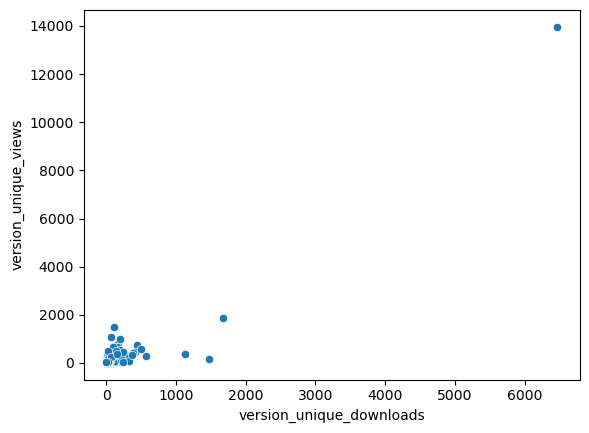

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=zenodoDF, x="version_unique_downloads", y="version_unique_views")
plt.show()

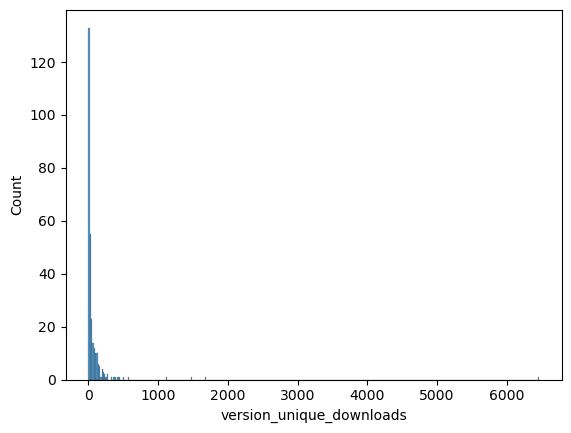

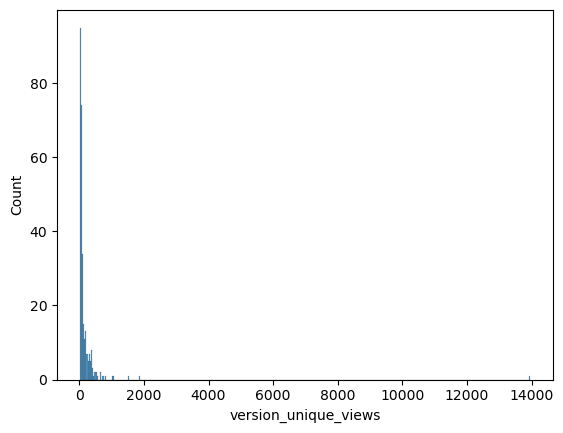

In [6]:
sns.histplot(data=zenodoDF, x="version_unique_downloads")
plt.show()

sns.histplot(data=zenodoDF, x="version_unique_views")
plt.show()

## License distribution

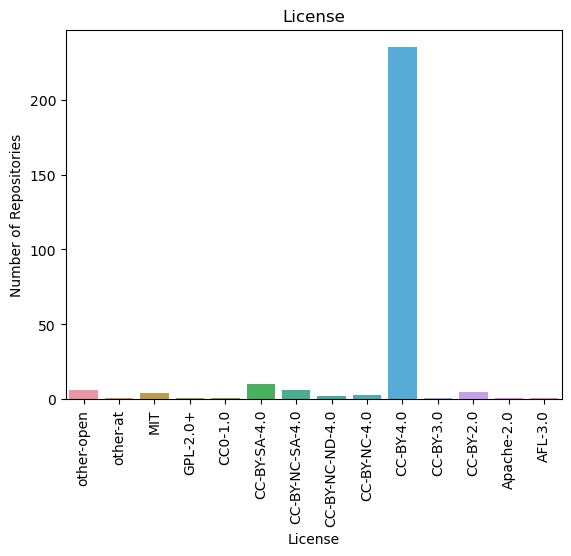

In [7]:
licenseDf = zenodoDF.groupby('license_id').count().sort_values(by=['license_id'], ascending=False).reset_index()

ax = sns.barplot(data=licenseDf, x='license_id', y='doi')
ax.set(xlabel='License', ylabel='Number of Repositories')
plt.title("License")
plt.xticks(rotation=90)
plt.show()

## Repository Type Distribution

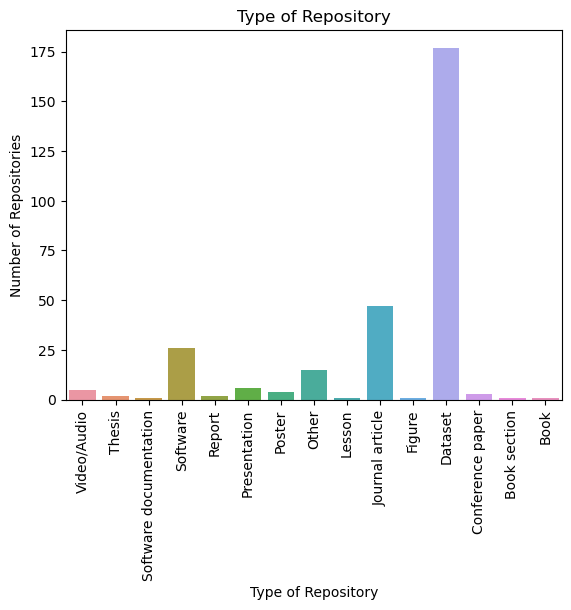

In [8]:
typeDF = zenodoDF.groupby('resource_type').count().sort_values(by=['resource_type'], ascending=False).reset_index()

ax = sns.barplot(data=typeDF, x='resource_type', y='version_unique_downloads', ci=None)
ax.set(xlabel='Type of Repository', ylabel='Number of Repositories')
plt.title("Type of Repository")
plt.xticks(rotation=90)
plt.show()

## Publication Date Distribution

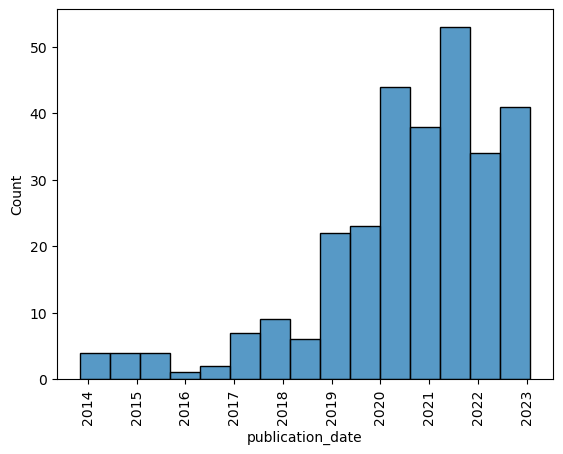

In [15]:
sns.histplot(data=zenodoDF, x="publication_date")
plt.xticks(rotation=90)
plt.show()

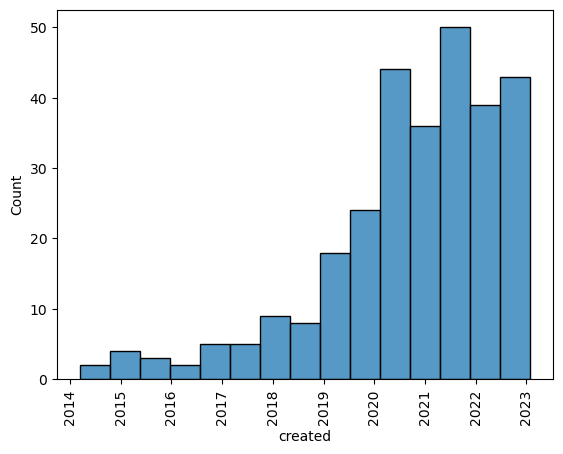

In [28]:
sns.histplot(data=zenodoDF, x="created")
plt.xticks(rotation=90)
plt.show()

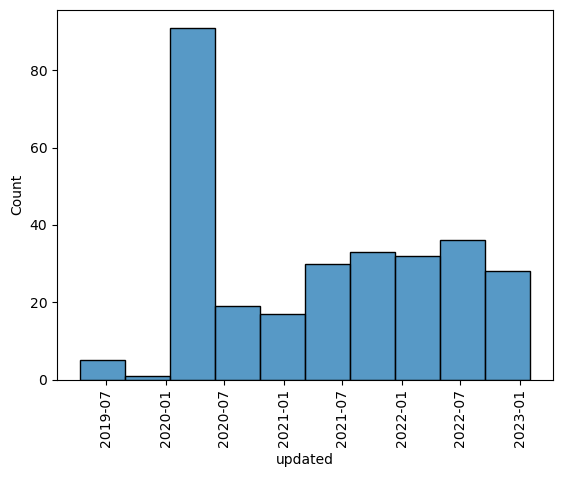

In [29]:
sns.histplot(data=zenodoDF, x="updated")
plt.xticks(rotation=90)
plt.show()

## Tableau Plots

## Ratio calculation per year

In [53]:
### Ratio Downloads/Repositories per year 
from datetime import datetime

aggregatedDF = zenodoDF.groupby(zenodoDF['year']).sum()
aggregatedDF["NRepositories"] =  zenodoDF.groupby(zenodoDF['year'])['doi'].count()

aggregatedDF["Downloads/Repositories"] = aggregatedDF['version_unique_downloads']/aggregatedDF['NRepositories']
aggregatedDF["Views/Repositories"] = aggregatedDF['version_unique_views']/aggregatedDF['NRepositories']

aggregatedDF = aggregatedDF.reset_index()
aggregatedDF

,year,version_downloads,version_unique_downloads,version_views,version_unique_views,NRepositories,Downloads/Repositories,Views/Repositories
0,2013,29.0,27.0,77.0,65.0,2,13.500000,32.500000
1,2014,1659.0,649.0,1779.0,1634.0,5,129.800000,326.800000
2,2015,540.0,346.0,2491.0,2326.0,6,57.666667,387.666667
3,2016,0.0,0.0,97.0,91.0,2,0.000000,45.500000
4,2017,1903.0,1016.0,2506.0,2163.0,14,72.571429,154.500000
5,2018,2622.0,1396.0,4067.0,3648.0,16,87.250000,228.000000
6,2019,7738.0,4484.0,5033.0,4456.0,37,121.189189,120.432432
7,2020,21082.0,7518.0,13713.0,12074.0,67,112.208955,180.208955
8,2021,12921.0,8631.0,26416.0,22077.0,78,110.653846,283.038462
9,2022,2339.0,1414.0,4225.0,3518.0,57,24.807018,61.719298


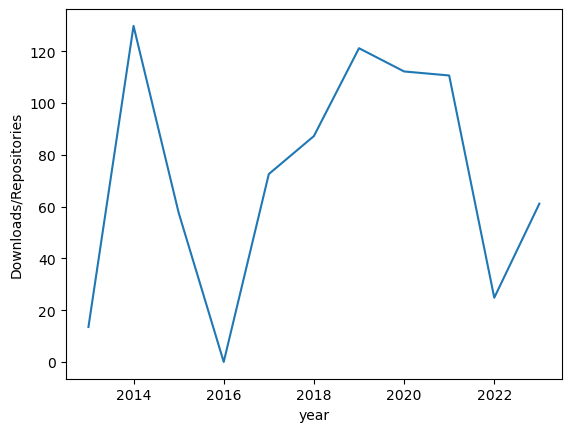

In [62]:
ax = sns.lineplot(data=aggregatedDF, x='year', y='Downloads/Repositories', ci=None)

# ax.set(xlabel='Type of Repository', ylabel='Number of Repositories')
# plt.title("Type of Repository")
# plt.xticks(rotation=90)
plt.show()

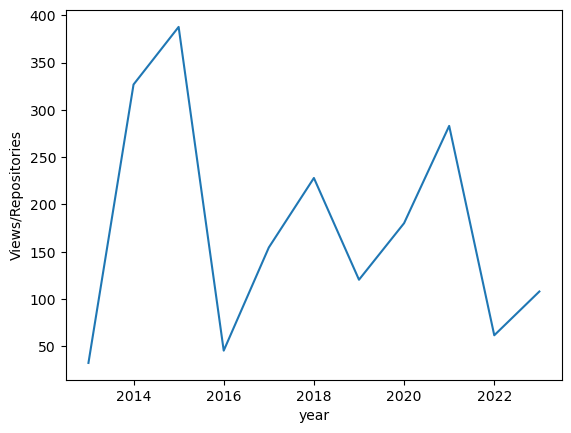

In [61]:
ax = sns.lineplot(data=aggregatedDF, x='year', y='Views/Repositories', ci=None)

# ax.set(xlabel='Type of Repository', ylabel='Number of Repositories')
# plt.title("Type of Repository")
# plt.xticks(rotation=90)
plt.show()

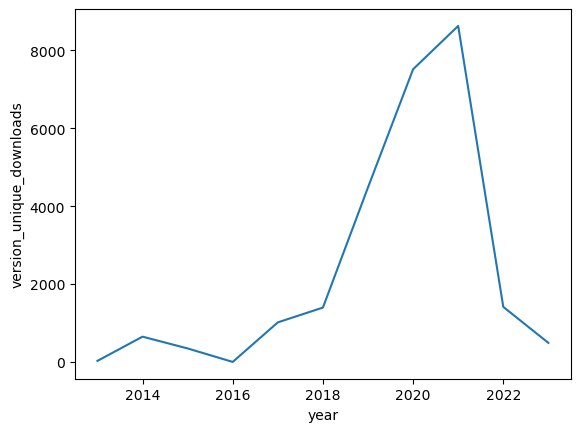

In [63]:
ax = sns.lineplot(data=aggregatedDF, x='year', y='version_unique_downloads', ci=None)

# ax.set(xlabel='Type of Repository', ylabel='Number of Repositories')
# plt.title("Type of Repository")
# plt.xticks(rotation=90)
plt.show()

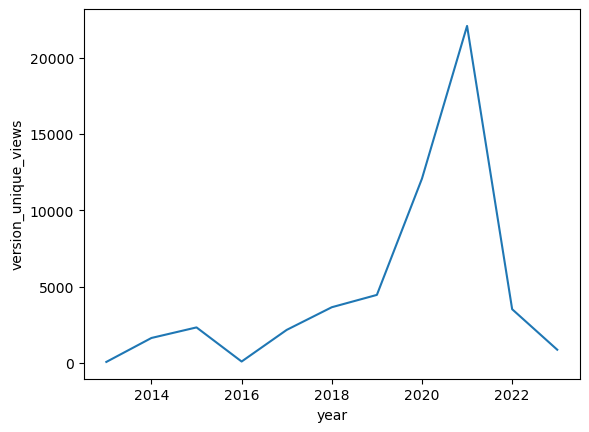

In [64]:
ax = sns.lineplot(data=aggregatedDF, x='year', y='version_unique_views', ci=None)

# ax.set(xlabel='Type of Repository', ylabel='Number of Repositories')
# plt.title("Type of Repository")
# plt.xticks(rotation=90)
plt.show()

## Export

In [68]:
zenodoDF['publication_date'] = zenodoDF['publication_date'].dt.tz_localize(None)
zenodoDF['created'] = zenodoDF['created'].dt.tz_localize(None)
zenodoDF['updated'] = zenodoDF['updated'].dt.tz_localize(None)

zenodoDF.to_excel("results/ZenodoEPFLRepositories.xlsx")  
zenodoDF.to_json("results/ZenodoEPFLRepositories.json", orient="records", date_format="iso")

In [69]:
aggregatedDF.to_excel("results/ZenodoEPFLAggregatedStats.xlsx")  
aggregatedDF.to_json("results/ZenodoEPFLAggregatedStats.json", orient="records", date_format="iso")